# Linear Regression

- In `regression` we fitting a curve, when we try to fit a line than it is called a `linear regression`

- In `polynomial regression` we trying to fit a curve instead of fitting a line.

In [56]:
# Equation of a line :
# Y = mx + c   (here m is a slope and c is an y intercept)


# We use this notation instead of y = mx + c
# Y = wx + b   (here w denotes weight and b here is called as bias)

## Import Settings

In [57]:
import numpy as np
import matplotlib.pyplot as plt

In [58]:
rng = np.random.default_rng(seed = 42)

## Dataset

We will generate a dataset where the relationship b/w the input and output is sinusoidal corrupted by some noise :     

$$
\begin{equation*}
y=\sin( 2\pi x) + ϵ
\end{equation*}
$$

Simple linear equation regression will just end up fitting a line. We will add powers of $x$ as new features to turn this into a "polynomial regression" problem. The data - matrix looks as follows for a power $p$.

$$
\begin{equation*}
\mathbf{X} = \begin{bmatrix}
1 & \cdots & 1\\
x_{1} & \cdots & X_{n}^{2}\\
\vdots & & \vdots \\
x_{1}^{p} & \cdots & x_{n}^{p}
\end{bmatrix}
\end{equation*}
$$

The shape of the data-matrix is $(p + 1) \times n$. The value of $d = p + 1$. We can now continue viewing this as a linear regression problem, with respect to this data - matrix $\mathbf{X}$ and label vector $\mathbf{y}$.

In [59]:
# For understanding
x = np.linspace(-1,1,5)
p = 2
print(x)

for j in range(3) :
  print(x **j)

[-1.  -0.5  0.   0.5  1. ]
[1. 1. 1. 1. 1.]
[-1.  -0.5  0.   0.5  1. ]
[1.   0.25 0.   0.25 1.  ]


In [60]:
n = 20
x = np.linspace(-1,1,n)
p = 8  # degree
X = np.array([x**j for j in range(p + 1)])
y_true = np.sin(2 * np.pi * x)
y = y_true + rng.normal(0,0.2, n)

X.shape, y.shape

((9, 20), (20,))

## Visualize  

Let us now visualize the dataset along with the underlying true relationship without the noise. We expect our regression model to capture that relationship while ignoring the noise

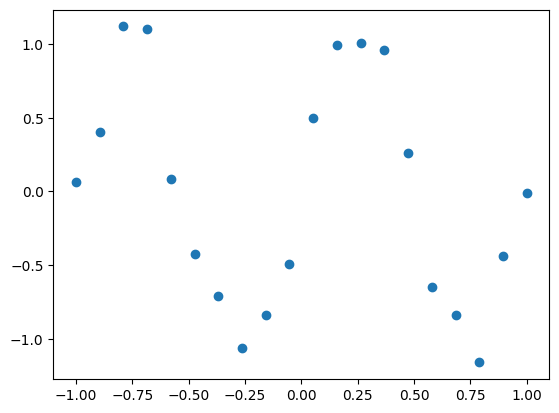

In [61]:
plt.scatter(x, y)

**I want to fit a curve in above scatter plot**

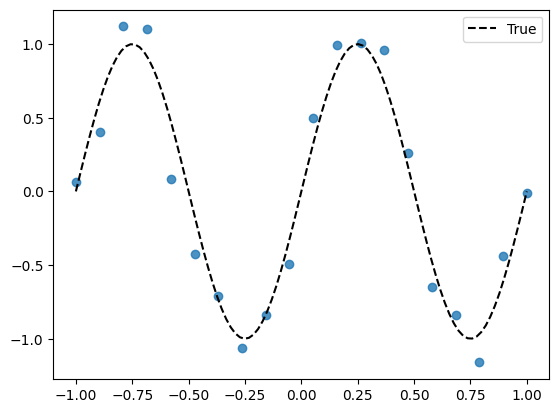

In [62]:
plt.scatter(x,y, alpha = 0.8)
x_vis = np.linspace(-1, 1, 100)
y_true_vis = np.sin(2 * np.pi * x_vis)
plt.plot(
    x_vis, y_true_vis,
    linestyle = '--',
    color = 'black',
    label = True
)
plt.legend()

## Model

The model is given by :     

$$
\begin{equation*}
f(\mathbf{x}) = \mathbf{w}^{T}\mathbf{x}
\end{equation*}
$$

In [63]:
def predict_point(w, x) :
  return w @ x   # here dot product b/w two vectors

If we need to generate predictions for an entire dataset, the expression for the vector of predictions is :       

$$
\begin{equation*}
\widehat{\mathbf{y}} =\mathbf{X}^{T}\mathbf{W}
\end{equation*}
$$

In [64]:
def predict_dataset(w, X) :
  return X.T @ w  # here dot product b/w matrix and a vector

## Loss Function

Let us implement the following version of SSE :     

$$
\begin{equation*}
L(\mathbf{X} ,\mathbf{y} ,\mathbf{w}) =\frac{1}{2}\sum\limits _{i=1}^{n}\left(\mathbf{w}^{T}\mathbf{x}_{i} -y_{i}\right)^{2} =\frac{1}{2} ||\mathbf{X}^{T}\mathbf{w} -\mathbf{y} ||^{2}
\end{equation*}
$$

In [65]:
def loss(X, y, w) :
  d, n = X.shape
  error = X.T @ w - y
  return 0.5 * (error ** 2).sum()

## Normal Equations

We can now solve for the optimal weight vector by minimizing the loss function. We have a closed form solution :     

$$
\begin{equation*}
\mathbf{w}^{*} = \left(\mathbf{X}^{T}\right)^{\dagger }\mathbf{y}
\end{equation*}
$$

In [66]:
w = np.linalg.pinv(X.T) @ y
print(w)
print(w.shape)

[  0.06185161   6.56205128  -0.93464463 -37.58762871   2.1702014
  55.1185918   -1.55573793 -24.10820647   0.27400338]
(9,)


## Visualize

In [67]:
y_pred_vis = np.array([w[i] * (x_vis ** i)
              for i in range(w.shape[0])])

y_pred_vis = y_pred_vis.sum(axis = 0)

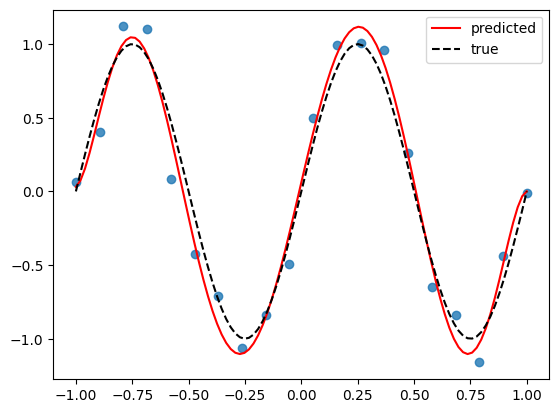

In [79]:
y_pred_vis = np.array([w[i] * (x_vis ** i)
              for i in range(w.shape[0])])

y_pred_vis = y_pred_vis.sum(axis = 0)

plt.scatter(x, y, alpha = 0.8)    # dataset
plt.plot(x_vis, y_pred_vis,
         color = 'red',
         label = 'predicted')
plt.plot(x_vis, y_true_vis,
         color = 'black',
         linestyle = '--',
         label = 'true')

plt.legend()

## Gradient Descent

We can approach the optimization problem via gradient descent as well :      

$$
\begin{equation*}
\mathbf{w}^{( t+1)} =\mathbf{w}^{( t)} -\eta \nabla L\left(\mathbf{w}^{( t)} ,\mathbf{X} ,\mathbf{y}\right)
\end{equation*}
$$

We will start by initialization the weight vector to the zero vector.

### Learning Rate

For linear Regression, we have a theorem that states that gradient descent (with w^0 = 0) will converge to the solution $\left(\mathbf{X}^{T}\right)^{\dagger }\mathbf{y}$ if the learning rate choses is in the range :       

$$
\begin{equation*}
0< \eta < \frac{2}{\sigma _{1}^{2}}
\end{equation*}
$$

where $\sigma_1$ is the largest singular value of $\mathbf{X}$. To get the singular values, we can use NumPy's SVD method :      

In [69]:
sigma_1 = np.linalg.svd(X)[1][0]
2 / sigma_1 ** 2

np.float64(0.07400384596691363)

In [80]:
eta = 0.07

## Convergence

To decide convergence of gradient descent, we are going to keep track of the value of the loss function at every iteration. When the difference is the values of the loss function for two successive iterations falls a certain threshold, we will terminate the learning loop. Bolstered by the theorem on the optimal learning rate for convergence, we are going to set the learning rate to a really low value.

10 ^ -15 in this case

In [105]:
d,n = X.shape
w = np.zeros(d)
loss_hist = [np.inf, 0]
iter = 0
tol = 1e-15

# learning loop
while abs(loss_hist[-1] - loss_hist[-2]) > tol :
  loss_hist.append(loss(X,y,w))
  grad = X @ X.T @ w - X @ y
  w -= eta * grad
  iter += 1

print(f"Convergence after {iter} iterations")
print(f"Loss at convergence = {loss_hist[-1]}")
print(f"Optimal weight vector, w = {w}")

Convergence after 1083114 iterations
Loss at convergence = 0.1745732684330259
Optimal weight vector, w = [  0.06184617   6.56205128  -0.93446821 -37.58762871   2.16930902
  55.1185918   -1.55430254 -24.10820647   0.27328747]


It has taken 1 million iterations for convergence with learning rate and toleance we have chosen! Let us see how close this is to the closed form solution returned by the normal equations.

In [112]:
print(w)  # GD
print(np.linalg.pinv(X.T) @ y)
np.linalg.norm(w - np.linalg.pinv(X.T) @ y)

[  0.06184617   6.56205128  -0.93446821 -37.58762871   2.16930902
  55.1185918   -1.55430254 -24.10820647   0.27328747]
[  0.06185161   6.56205128  -0.93464463 -37.58762871   2.1702014
  55.1185918   -1.55573793 -24.10820647   0.27400338]


np.float64(0.001844009550950987)

We seet that the two vectors are remarkably close, both by comparing the vectors element-wise and by looking at the norm of their difference!